In [1]:
import os
import numpy as np
from skimage import io, color, exposure, transform
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


In [2]:
# Function to load and preprocess images
def preprocess_img(img_path, img_size):
    img = io.imread(img_path)
    if img.ndim == 3:  # Check if image has three color channels
        img = color.rgb2gray(img)  # Convert to grayscale
    img = transform.resize(img, img_size)  # Resize image
    img = exposure.equalize_hist(img)  # Enhance contrast
    return img


In [3]:
# Function to load dataset
def load_data(data_dir, img_size):
    X = []
    y = []
    labels = os.listdir(data_dir)
    for label in labels:
        label_dir = os.path.join(data_dir, label)
        for img_file in os.listdir(label_dir):
            img_path = os.path.join(label_dir, img_file)
            img = preprocess_img(img_path, img_size)
            X.append(img)
            y.append(label)
    return np.array(X), np.array(y)

In [4]:
# Data directory
data_dir = "E:\hand_gesture_E_chart\gestures"
img_size = (200, 200)  # Size to resize images


In [5]:
# Load dataset
X, y = load_data(data_dir, img_size)



In [6]:
# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Flatten the images
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [8]:
# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)


In [9]:

# Train the classifier
rf_classifier.fit(X_train, y_train)



RandomForestClassifier(random_state=42)

In [10]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

In [11]:
# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Generate classification report
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Generate confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

Accuracy: 0.9958333333333333
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       270
           1       1.00      1.00      1.00       218
           2       0.99      1.00      0.99       244
           3       1.00      1.00      1.00       228

    accuracy                           1.00       960
   macro avg       1.00      1.00      1.00       960
weighted avg       1.00      1.00      1.00       960

Confusion Matrix:
[[269   0   1   0]
 [  0 217   1   0]
 [  0   0 243   1]
 [  0   0   1 227]]


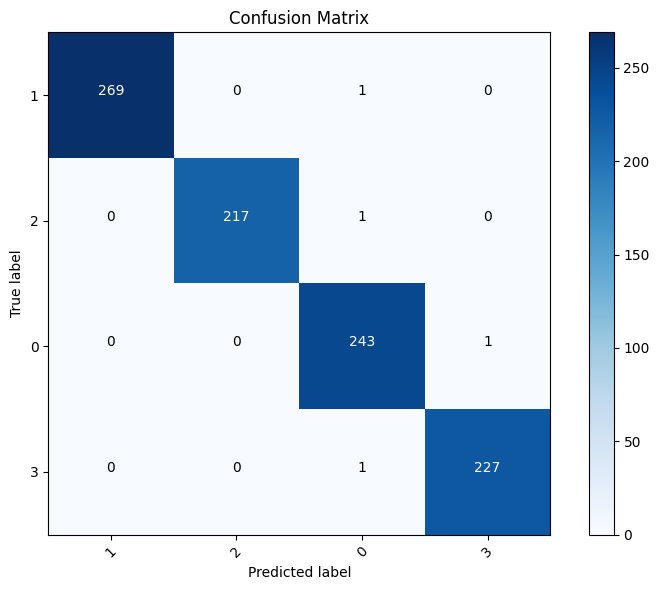

In [12]:
# Plotting the confusion matrix
import matplotlib.pyplot as plt
import itertools
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(set(y)))
plt.xticks(tick_marks, set(y), rotation=45)
plt.yticks(tick_marks, set(y))
fmt = 'd'
thresh = conf_matrix.max() / 2.
for i, j in itertools.product(range(conf_matrix.shape[0]), range(conf_matrix.shape[1])):
    plt.text(j, i, format(conf_matrix[i, j], fmt),
             horizontalalignment="center",
             color="white" if conf_matrix[i, j] > thresh else "black")
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.tight_layout()

In [13]:
print(X[0])


[[0.62085    0.62085    0.62085    ... 0.62085    0.62085    0.64018618]
 [0.62085    0.62085    0.62085    ... 0.62085    0.62085    0.66224629]
 [0.62085    0.62085    0.62085    ... 0.62085    0.64018618 0.62085   ]
 ...
 [0.62085    0.62085    0.62085    ... 0.62085    0.62085    0.62085   ]
 [0.62085    0.62085    0.62085    ... 0.62085    0.62085    0.62085   ]
 [0.62085    0.62085    0.62085    ... 0.62085    0.62085    0.62085   ]]


In [14]:
print(y[0])

0


In [15]:
print(X[0][0],y[0])

[0.62085    0.62085    0.62085    0.62085    0.62085    0.62085
 0.62085    0.62085    0.62085    0.62085    0.62085    0.62085
 0.62085    0.62085    0.62085    0.62085    0.62085    0.62085
 0.62085    0.62085    0.62085    0.62085    0.62085    0.62085
 0.62085    0.62085    0.62085    0.62085    0.62085    0.62085
 0.62085    0.62085    0.62085    0.62085    0.62085    0.62085
 0.62085    0.62085    0.62085    0.62085    0.62085    0.62085
 0.62085    0.62085    0.62085    0.62085    0.62085    0.62085
 0.62085    0.62085    0.62085    0.62085    0.62085    0.62085
 0.62085    0.62085    0.62085    0.62085    0.62085    0.62085
 0.62085    0.62085    0.62085    0.62085    0.62085    0.62085
 0.62085    0.62085    0.62085    0.62085    0.62085    0.62085
 0.62085    0.62085    0.62085    0.62085    0.62085    0.62085
 0.62085    0.62085    0.62085    0.62085    0.62085    0.62085
 0.62085    0.62085    0.62085    0.62085    0.62085    0.64018618
 0.64018618 0.62085    0.62085    0.6

In [16]:
import joblib
# Save the trained Random Forest classifier as a .h5 file
model_filename = 'random_forest_model.h5'
joblib.dump(rf_classifier, model_filename)
print(f"Model saved as {model_filename}")

Model saved as random_forest_model.h5
